In [7]:
import numpy as np
import control as ct

In [8]:
n_integration_points = 1000
t, integration_step = np.linspace(0, 20, n_integration_points, retstep=True)  # array 1x100

# Wanted
x0 = 3
y0 = 2
th0 = 7
Td = 2
om_d = (2 * np.pi) / Td

xd = 10 + x0 * np.sin(om_d * t)
xdp = om_d * x0 * np.cos(om_d * t)
yd = y0 + y0 * np.cos(om_d * t)
ydp = - om_d * y0 * np.sin(om_d * t)
thd = th0 * np.ones_like(t)
thdp = 0

w = np.zeros((len(t), 6))  # w = [xdp, ydp, thdp, xd, yd, thd]

w[:, 0] = xdp
w[:, 1] = ydp
w[:, 2] = thdp
w[:, 3] = xd
w[:, 4] = yd
w[:, 5] = thd

In [9]:
m = 0.06  # kg
J = 0.35  # m^4
g = 9.81  # m/s^2
theta = 7 * np.pi / 180  # rad
dtheta = 0

M = np.array([[m, 0, 0],
              [0, m, 0],
              [0, 0, J]])

G = np.array([[0],
              [m * g],
              [0]])

Z = 0 * M
I = np.identity(3, dtype=float)

A1 = np.append(Z, I, axis=0)
A2 = np.append(Z, Z, axis=0)
A = np.append(A1, A2, axis=1)

Bzero = np.identity(3)

Bc = np.append((-np.linalg.inv(M)) * Bzero, Z, axis=0)

Q = 20 * np.identity(6)  # Adjust the size of Q to match Bc

R = 1 * np.identity(3)  # Adjust the size of R to match Bc

N = np.identity(6)

# Calculate the control gain K
K, S, E = ct.lqr(A, Bc, Q, R)

In [10]:
"""
without control force:  M*qp + G = 0         ->      qp = -M^(-1)*G
with control force:     M*qp + G = uc        ->      qp = -M^(-1)*G + M^(-1)*uc

uc = -K*(q - w)
qp = -M^(-1)G + M^(-1)*(-K(q - w))         ->      qp = -M^(-1)*G - M^(-1)*K*q + M^(-1)*K*w
"""

q = np.zeros((len(t), 6))
q[0, :] = 0, 0., dtheta, 0., 0., theta


def rk4(t, fun, x, dt, *args, **kwargs):
    k1 = fun(t, x, *args, **kwargs)
    k2 = fun(t + dt / 2, x + dt / 2 * k1, *args, **kwargs)
    k3 = fun(t + dt / 2, x + dt / 2 * k2, *args, **kwargs)
    k4 = fun(t + dt, x + + dt * k3, *args, **kwargs)
    return x + dt / 6 * (k1 + 2 * k2 + 2 * k3 + k4)


def dynamic(t, q, counter):
    """
    global teste
    teste = 3
    """
    dx, dy, dz = q[0:3]
    x, y, z = q[3:6]

    dq = np.zeros_like(q)
    dq[3:6] = q[0:3]

    dq[0:3] = (np.linalg.inv(M) @ G).flatten() + np.linalg.inv(M) @ K @ (q - w[counter, :])

    return dq

In [11]:
o = np.zeros((len(t), 6))
o[:, 0] = q[:, 0] - w[:, 0] # Significa o erro entre a velocidade inputada e a velocidade e a desejada
o[:, 1] = q[:, 1] - w[:, 1]
o[:, 2] = q[:, 2] - w[:, 2]
o[:, 3] = q[:, 3] - w[:, 3]
o[:, 4] = q[:, 4] - w[:, 4]
o[:, 5] = q[:, 5] - w[:, 5]

# Erro em x
e_p_deslocx = (abs(o[:, 3])/abs(w[:, 3]))*100 # Erro percentual
limite = 5. # Erro percentual admissível
resultado1 = np.array([])

for valor in e_p_deslocx:
    if valor <= limite:
        break
    resultado1 = np.append(resultado1, valor)

reta_lim_deslocx = t[len(resultado1)-1]
"""
print(len(resultado1)-1) # Devolve o número da coluna de t
print(reta_lim_deslocx) # Devolve o instante de t a partir do qual o erro se torna admissível
"""

# Erro em y
e_p_deslocy = (abs(o[:, 4])/abs(w[:, 4]))*100
resultado2 = np.array([])

for valor in e_p_deslocy:
    if valor <= limite:
        break
    resultado2 = np.append(resultado2, valor)

reta_lim_deslocy = t[len(resultado2)-1]
"""
print(len(resultado2)-1)
print(reta_lim_deslocy)
"""

# Erro em z
e_p_deslocz = (abs(o[:, 5])/abs(w[:, 5]))*100
resultado3 = np.array([])

for valor in e_p_deslocz:
    if valor <= limite:
        break
    resultado3 = np.append(resultado3, valor)

reta_lim_deslocz = t[len(resultado3)-1]
"""
print(len(resultado3)-1)
print(reta_lim_deslocz)
"""

'\nprint(len(resultado3)-1)\nprint(reta_lim_deslocz)\n'

findfont: Font family 'TeX Gyre Termes' not found.
findfont: Font family 'TeX Gyre Termes' not found.
findfont: Font family 'TeX Gyre Termes' not found.
findfont: Font family 'TeX Gyre Termes' not found.
findfont: Font family 'TeX Gyre Termes' not found.
findfont: Font family 'TeX Gyre Termes' not found.
findfont: Font family 'TeX Gyre Termes' not found.
findfont: Font family 'TeX Gyre Termes' not found.
findfont: Font family 'TeX Gyre Termes' not found.
findfont: Font family 'TeX Gyre Termes' not found.
findfont: Font family 'TeX Gyre Termes' not found.
findfont: Font family 'TeX Gyre Termes' not found.
findfont: Font family 'TeX Gyre Termes' not found.
findfont: Font family 'TeX Gyre Termes' not found.
findfont: Font family 'TeX Gyre Termes' not found.
findfont: Font family 'TeX Gyre Termes' not found.
findfont: Font family 'TeX Gyre Termes' not found.
findfont: Font family 'TeX Gyre Termes' not found.
findfont: Font family 'TeX Gyre Termes' not found.
findfont: Font family 'TeX Gyre

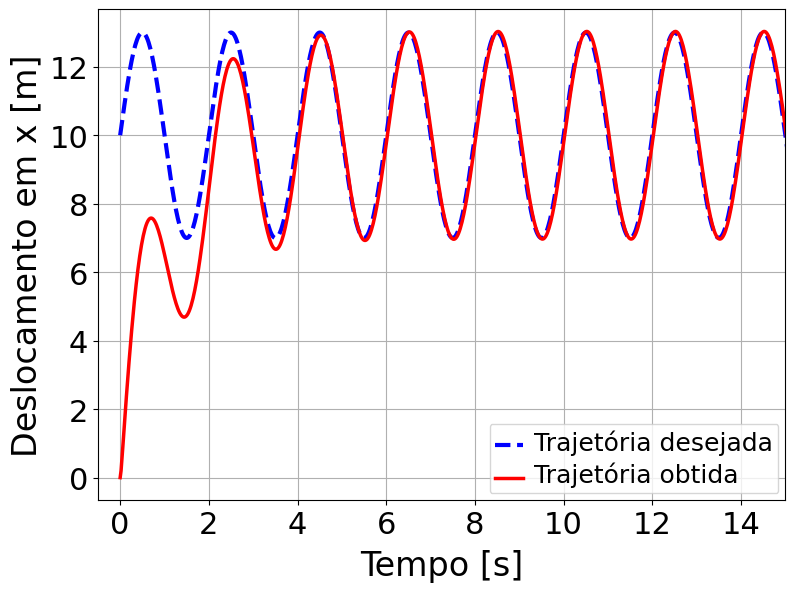

findfont: Font family 'TeX Gyre Termes' not found.
findfont: Font family 'TeX Gyre Termes' not found.
findfont: Font family 'TeX Gyre Termes' not found.
findfont: Font family 'TeX Gyre Termes' not found.
findfont: Font family 'TeX Gyre Termes' not found.


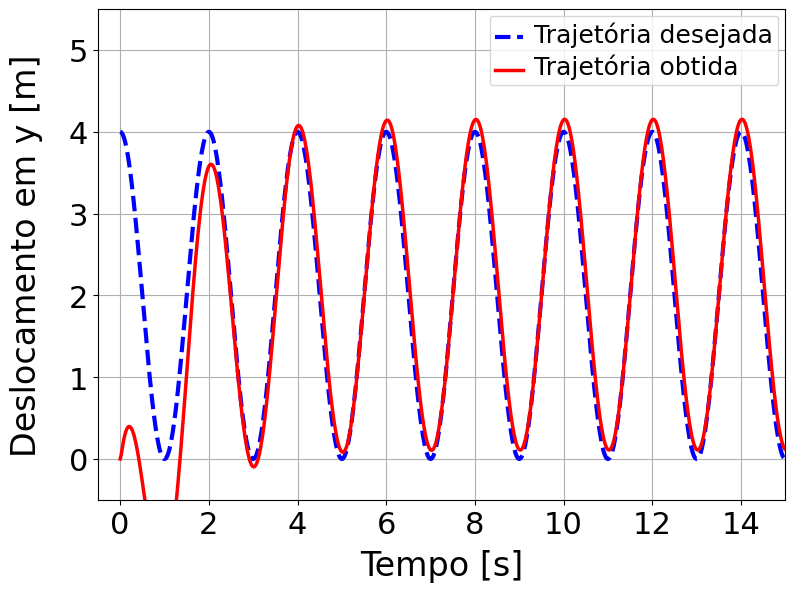

findfont: Font family 'TeX Gyre Termes' not found.
findfont: Font family 'TeX Gyre Termes' not found.
findfont: Font family 'TeX Gyre Termes' not found.
findfont: Font family 'TeX Gyre Termes' not found.
findfont: Font family 'TeX Gyre Termes' not found.


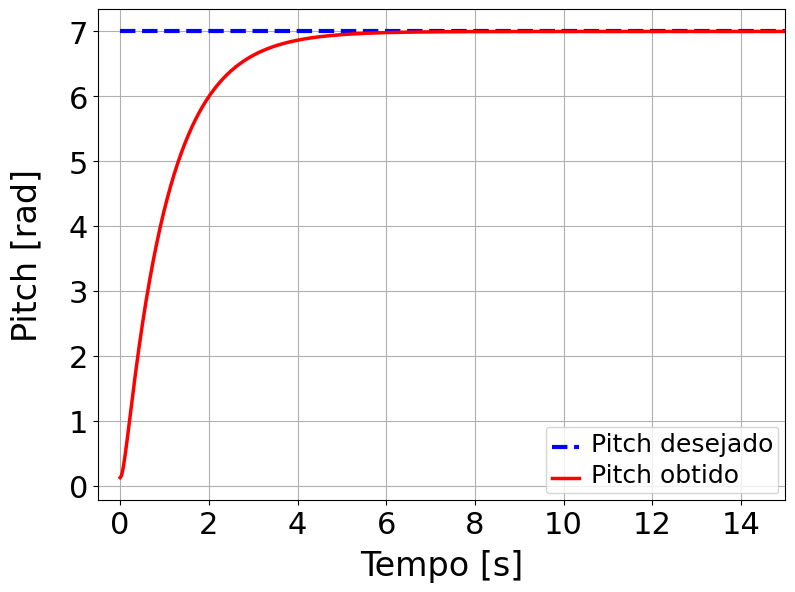

In [12]:
for counter, _t in enumerate(t[:-1]):
    q[counter + 1, :] = rk4(_t, dynamic, q[counter, :], integration_step, counter)

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Definindo a fonte TeX Gyre Termes
font = {'family': 'serif', 'fontname': 'TeX Gyre Termes', 'color': 'black', 'weight': 'normal', 'size': 14}

# Gráfico 1 (Deslocamento em x)
fig1, ax1 = plt.subplots(figsize=(8, 6))  # Definindo o tamanho da figura
ax1.plot(t, w[:, 3], color='b', linestyle='--', linewidth=3, label=r'Trajetória desejada')
ax1.plot(t, q[:, 3], color='r', linewidth=2.5, label=r'Trajetória obtida')
ax1.set_xlabel(r'Tempo [s]', fontdict=font)  # Aplicando a fonte ao rótulo do eixo x
ax1.set_ylabel(r'Deslocamento em x [m]', fontdict=font)  # Aplicando a fonte ao rótulo do eixo y
ax1.legend(fontsize=12, loc='upper right')  # Ajustando o tamanho da legenda e sua posição
ax1.tick_params(axis='both', which='major', labelsize=12)  # Aumentando o tamanho dos rótulos dos eixos
plt.grid(True)
"""
# Adicionando a linha vertical paralela ao eixo y
valor_xx = reta_lim_deslocx  # Defina o valor x onde você deseja a linha
ax1.axvline(x=valor_xx, color='green', linewidth=2, linestyle=':', label='Limite')
"""
# Alterando a fonte da legenda
legend = ax1.legend()
for text in legend.get_texts():
    text.set_fontsize(18)

# Alterando a fonte dos números nos eixos
ax1.xaxis.label.set_fontsize(24)
ax1.yaxis.label.set_fontsize(24)

# Alterando a fonte dos rótulos dos eixos
for tick in ax1.get_xticklabels():
    tick.set_fontsize(22)
for tick in ax1.get_yticklabels():
    tick.set_fontsize(22)

ax1.set_xlim(min(t)-0.5, max(t)-5)

# Define a posição dos rótulos dos eixos x e y
ax1.xaxis.set_label_coords(0.5, -0.1)  # Move o rótulo do eixo x abaixo do eixo
ax1.yaxis.set_label_coords(-0.08, 0.5)  # Move o rótulo do eixo y para a esquerda do eixo

plt.tight_layout()
#plt.savefig('gcontrol_deslocx.pdf', bbox_inches='tight', format='pdf')
#plt.savefig('gerro_deslocx.pdf', bbox_inches='tight', format='pdf')
#plt.show()

# Gráfico 2 (Deslocamento em y)
fig2, ax2 = plt.subplots(figsize=(8, 6))
ax2.plot(t, w[:, 4], color='b', linestyle='--', linewidth=3, label=r'Trajetória desejada')
ax2.plot(t, q[:, 4], color='r', linewidth=2.5, label=r'Trajetória obtida')
ax2.set_xlabel(r'Tempo [s]', fontdict=font)
ax2.set_ylabel(r'Deslocamento em y [m]', fontdict=font)
ax2.legend(fontsize=12, loc='upper right')
ax2.tick_params(axis='both', which='major', labelsize=12)
plt.grid(True)
"""
# Adicionando a linha vertical paralela ao eixo y
valor_xy = reta_lim_deslocy  # Defina o valor x onde você deseja a linha
ax2.axvline(x=valor_xy, color='green', linewidth=1.5, linestyle=':', label='Limite')
"""
legend = ax2.legend()
for text in legend.get_texts():
    text.set_fontsize(18)

ax2.xaxis.label.set_fontsize(24)
ax2.yaxis.label.set_fontsize(24)

for tick in ax2.get_xticklabels():
    tick.set_fontsize(22)
for tick in ax2.get_yticklabels():
    tick.set_fontsize(22)

ax2.set_xlim(min(t)-0.5, max(t)-5)
ax2.set_ylim(min(t)-0.5, max(t)-14.5)

ax2.xaxis.set_label_coords(0.5, -0.1)
ax2.yaxis.set_label_coords(-0.08, 0.5)

plt.tight_layout()
#plt.savefig('gcontrol_desclocy.pdf', bbox_inches='tight', format='pdf')
#plt.savefig('gerro_desclocy.pdf', bbox_inches='tight', format='pdf')
#plt.show()

# Gráfico 3 (Pitch)
fig3, ax3 = plt.subplots(figsize=(8, 6))
ax3.plot(t, w[:, 5], color='b', linestyle='--', linewidth=3, label=r'Pitch desejado')
ax3.plot(t, q[:, 5], color='r', linewidth=2.5, label=r'Pitch obtido')
ax3.set_xlabel(r'Tempo [s]', fontdict=font)
ax3.set_ylabel(r'Pitch [rad]', fontdict=font)
ax3.legend(fontsize=12, loc='upper right')
ax3.tick_params(axis='both', which='major', labelsize=12)
plt.grid(True)
"""
# Adicionando a linha vertical paralela ao eixo y
valor_xz = reta_lim_deslocz  # Defina o valor x onde você deseja a linha
ax3.axvline(x=valor_xz, color='green', linewidth=1.5, linestyle=':', label='Limite')
"""
legend = ax3.legend()
for text in legend.get_texts():
    text.set_fontsize(18)

ax3.xaxis.label.set_fontsize(24)
ax3.yaxis.label.set_fontsize(24)

for tick in ax3.get_xticklabels():
    tick.set_fontsize(22)
for tick in ax3.get_yticklabels():
    tick.set_fontsize(22)

ax3.set_xlim(min(t)-0.5, max(t)-5)

ax3.xaxis.set_label_coords(0.5, -0.1)
ax3.yaxis.set_label_coords(-0.08, 0.5)

plt.tight_layout()
#plt.savefig('gcontrol_pitch.pdf', bbox_inches='tight', format='pdf')
#plt.savefig('gerro_pitch.pdf', bbox_inches='tight', format='pdf')
#plt.show()

In [ ]:
def erro(q, w, i):
    return w[:, i] - q[:, i]

erro_plot1 = (erro(q, w, 3))/np.max(erro(q, w, 3))
erro_plot2 = (erro(q, w, 4))/np.max(erro(q, w, 4))
erro_plot3 = (erro(q, w, 5))/np.max(erro(q, w, 5))

# Gráfico 4 (Erros)
fig4, ax4 = plt.subplots(figsize=(8, 3))
ax4.plot(t, erro_plot1, linewidth=2.5, color='deeppink', label=r'Erro de trajetoria em x')
ax4.plot(t, erro_plot2, color='orange', linewidth=2.5, label=r'Erro de trajetoria em y')
ax4.plot(t, erro_plot3, color='deepskyblue', linestyle=(0, (3, 1, 1, 1)), linewidth=3, label=r'Erro no pitch')
ax4.set_xlabel(r'Tempo [s]', fontsize=16, fontdict=font)
ax4.set_ylabel(r'Erro normalizado', fontsize=16, fontdict=font)
ax4.legend(fontsize=14)
ax4.tick_params(axis='both', which='major', labelsize=15)
ax4.set_xlim(min(t)-0.5, max(t)-5)
plt.grid(True)

valor = 0.05  # Defina o valor x onde você deseja a linha
ax4.axhline(y=valor, color='green', linewidth=2, linestyle=':', label='Limite')

# Alterando a fonte da legenda
legend = ax4.legend()
for text in legend.get_texts():
    text.set_fontsize(17)
    text.set_fontname("TeX Gyre Termes")

# Alterando a fonte dos números nos eixos
ax4.xaxis.label.set_fontsize(22)
ax4.yaxis.label.set_fontsize(22)

# Alterando a fonte dos rótulos dos eixos
for tick in ax4.get_xticklabels():
    tick.set_fontsize(20)
    tick.set_fontname("TeX Gyre Termes")
for tick in ax4.get_yticklabels():
    tick.set_fontsize(20)
    tick.set_fontname("TeX Gyre Termes")

# Define a posição dos rótulos dos eixos x e y
ax4.xaxis.set_label_coords(0.5, -0.22)  # Move o rótulo do eixo x abaixo do eixo
ax4.yaxis.set_label_coords(-0.08, 0.5)  # Move o rótulo do eixo y para a esquerda do eixo

# Define o formato dos ticks do eixo y como inteiros
ax4.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: float(x)))

plt.tight_layout()
plt.savefig('gerro_normal.pdf', bbox_inches='tight', format='pdf')
plt.show()

In [ ]:
# Gráfico 3 (Pitch)
fig8, ax8 = plt.subplots(figsize=(8, 6))
ax8.plot(yd, xd, color='b', linestyle='--', linewidth=3, label=r'')
ax8.set_xlabel(r'Tempo [s]', fontdict=font)
ax8.set_ylabel(r'Pitch [rad]', fontdict=font)
ax8.legend(fontsize=12, loc='upper right')
ax8.tick_params(axis='both', which='major', labelsize=12)
plt.grid(True)
plt.show()